In [3]:
import numpy as np
from Modules.Evaluation import EvaluationFramework
from pyod.models.iforest import IForest

In [15]:
def generate_data():
    x1 = np.random.multivariate_normal([10,24,1], [[5,0,0],[0,15,0],[0,0,1]], 100)
    x2 = np.random.multivariate_normal([10,24,1], [[15,0,0],[0,5,0],[0,0,2]], 100)
    x3 = np.random.multivariate_normal([10,24,1], [[5,0,0],[0,4,0],[0,0,13]], 100)
    x4 = np.array(list(zip(np.random.uniform(-50,50,10), np.random.uniform(-50,50,10), np.random.uniform(-50,50,10))))

    X = np.concatenate([x1, x2, x3, x4])
    Y = np.concatenate([np.zeros(len(x1)), np.zeros(len(x2)), np.zeros(len(x3)), np.ones(len(x4))])
    return (X,Y)

# Model and Data

Define model and data

In [16]:
x,y = generate_data()
model = IForest(n_estimators=100,
                max_samples='auto',
                contamination=10/310,
                bootstrap=False,
                max_features=1.0)

# Evaluation 

Evaluation framework.

In [18]:
eva = EvaluationFramework(model)

In [19]:
eva.fit(x)

In [22]:
results = eva.predict(x, y)
predictions = results['predictions']
scores = results['scores']

In [24]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [23]:
scores

{'ROC-AUC': 1.0,
 'Detection-Rate': 1.0,
 'False-Alarm': 0.0,
 'F1-Score': 1.0,
 'Log-Likelihood': 9.992007221626413e-16}

### Dimension Reduction

Visualising predictions using PCA, t-SNE, and UMAP.

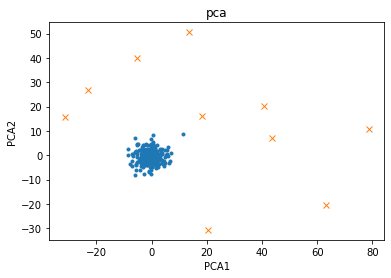

In [25]:
eva.visualise(x)

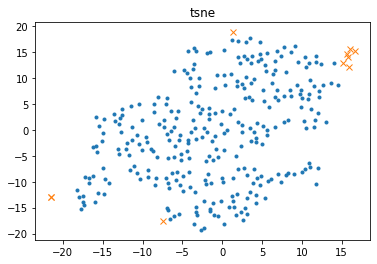

In [26]:
eva.visualise(x, method='tsne')

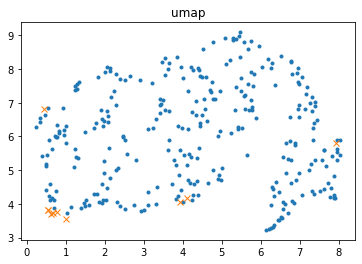

In [27]:
eva.visualise(x, method='umap')

## Retrieve Dimension Reduction



In [29]:
eva.dim_reduction(x, method='pca')

array([[ 1.26136562e+00, -1.98709842e+00],
       [-7.82542344e+00, -3.80099458e+00],
       [-3.76385562e+00, -2.31568655e+00],
       [-4.65894269e-01,  2.62138518e+00],
       [-3.03069139e-01, -2.66310583e+00],
       [ 3.92768436e+00,  6.76324972e-01],
       [ 2.29868265e+00,  4.80667363e-01],
       [-1.55088413e+00,  2.89268398e-01],
       [ 1.83478423e+00,  4.34085588e+00],
       [-2.80353483e-01,  2.58469204e+00],
       [-1.84549593e-01,  2.10593501e+00],
       [-6.30577175e-01, -1.46384327e+00],
       [ 2.07549043e+00,  1.04234293e+00],
       [-2.97736005e+00, -4.34373215e+00],
       [-1.68572717e+00, -1.39898231e+00],
       [-5.82623873e+00, -5.86920338e+00],
       [ 8.43528459e-01, -1.16779202e-01],
       [ 8.22426094e-01,  6.97186328e-01],
       [ 4.64520327e+00, -2.37213296e+00],
       [-2.46763486e+00, -9.89807061e-01],
       [ 1.98418433e-01,  3.11997633e-01],
       [-5.68853941e+00, -4.16020459e+00],
       [ 1.10514333e+00, -3.43235350e-03],
       [-2.